## 高斯判别分析(Gaussian Discriminant Analysis)

- 模型假设数据遵循高斯分布, 且不同分类的数据方差一致

- 对 $P(y|x)$ 进行建模, 求最优时, 方程为: $$P(y|x) = P(x|y)P(y)$$

- 其中 $P(y)$ 在二分类中遵循伯努利方程, 故: $$P(y) = \phi^y(1-\phi)^{1-y} $$

- 根据第一行的假设: $$P(x|y) = N(\mu_1,\Sigma)^y\cdot N(\mu_2,\Sigma)^{1-y} $$

- 建立mle, 求解最优参数: 

$$\begin{align} L(\theta) 
= & log\prod_{i=1}^{N}(P(x_i|y_i)P(y_i)) \\
= & \sum_{n=1}^N (log(N(\mu_1,\Sigma)^{y_i}\cdot N(\mu_2,\Sigma)^{1-y_i}) +log(\phi^{y_i}(1-\phi)^{1-y_i}))\\
= & \sum_{n=1}^N (y_ilog(N(\mu_1,\Sigma) + (1-y_i)logN(\mu_2,\Sigma) + y_ilog\phi +(1-y_i)log(1-\phi)))\\
= & \sum_{n=1}^{N_1}log(N(\mu_1,\Sigma) + \sum_{n=1}^{N_2}logN(\mu_2,\Sigma) +N_1log\phi +N_2log(1-\phi))\\
\end{align}
$$

- 其中 $\theta = (\phi, \mu_1, \mu_1, \Sigma)$

- 对 $\phi$ 求导, 其是 $y = 1$的频率: $$ \phi = \frac{N_1}{N}$$

- $ \mu_1, \mu_2 $ 可以直接计算样本均值, 公式为: $$ \mu_1 = \frac{1}{N_1}\sum_{n=1}^{N_1}x_i, \mu_2 = \frac{1}{N_2}\sum_{n=1}^{N_2}x_i$$

- 求协方差 $\Sigma$, 引入矩阵迹的求导和转换公式, 先计算单项分布公式: 
$$\begin{align} \sum_{n=1}^{N}logN(\mu,\Sigma)
= & \sum_{n=1}^{N}log(\frac{1}{(2\pi)^{\frac{p}{2}}|\Sigma|^{\frac12}}exp(-\frac12(x-\mu)^T\Sigma^{-1}(x-\mu))) \\
= & -\frac12Nlog|\Sigma| - \frac12\sum_{n=1}^{N}(x-\mu)^T\Sigma^{-1}(x-\mu) + C \\
\end{align}
$$

- 结合 $tr(ABC) = tr(CAB) $ 和 $$ S = \sum_{n=1}^{N}(x-\mu)^T(x-\mu)$$

- 可得 $$ \sum_{n=1}^{N}logN(\mu,\Sigma) = -\frac12Nlog|\Sigma| - \frac12Ntr(S\Sigma^{-1}) + C$$

- 代入到 $L(\theta)$对协方差 $\Sigma$ 求导可得: $$ \Sigma = \frac1N(N_1S_1^T + N_2S_2^T)$$

[74.7189227  73.95640208]


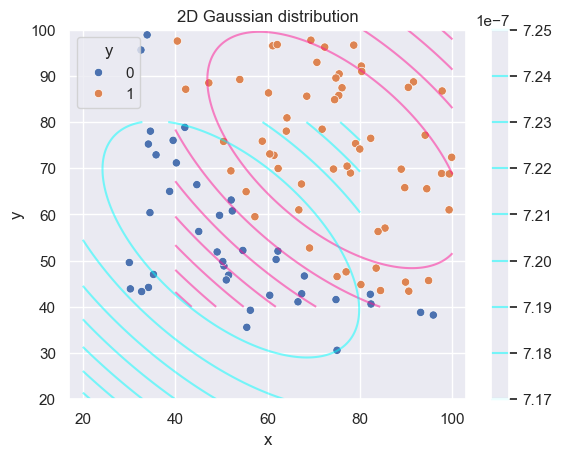

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataUrl = '.\\scatter.csv'
df = pd.read_csv(dataUrl)

sns.set()
sns.scatterplot(x="x1", y="x2", hue="y",data=df)
D1 = df.query("y==1")
D2 = df.query("y==0")
X1 = np.array(D1)[:,:2]
X2 = np.array(D2)[:,:2]
y1 = np.array(D1)[:,-1]
y2 = np.array(D2)[:,-1]

u1 = np.mean(X1, axis=0)
u2 = np.mean(X2, axis=0)
N = len(df)
N1 = len(D1)
N2 = len(D2)
np.dot((X1-u1).T, (X1-u1))
sigma = (N1*(np.dot((X1-u1).T, (X1-u1)).T + N2*(np.dot((X2-u2).T, (X2-u2)).T)))/N
print(u1)
sigma

x1 = np.linspace(40,100, 600)
y1 = np.linspace(40,100, 600)
X_1, Y_1 = np.meshgrid(x1,y1)
Z1 = np.dstack((X_1,Y_1))

x2 = np.linspace(20,80, 600)
y2 = np.linspace(20,80, 600)
X_2, Y_2 = np.meshgrid(x2,y2)
Z2 = np.dstack((X_2,Y_2))

# 计算二维高斯分布的概率密度函数
def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...',  pos-mu,Sigma_inv,pos-mu)
    return np.exp(-fac / 2) / N

# 计算每个网格点的概率密度
pdf1 = multivariate_gaussian(Z1, u1, sigma)
pdf2 = multivariate_gaussian(Z2, u2, sigma)
#绘制等高线图
plt.contour(X_1, Y_1, pdf1, colors='deeppink', alpha=0.5)
plt.contour(X_2, Y_2, pdf2, colors='cyan', alpha=0.5)
# plt.contourf(X, Y, pdf, cmap='Blues')
plt.colorbar()
plt.title('2D Gaussian distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()